In [1]:
packages <- c("ggplot2", "dplyr", "patchwork", "tidyr")
for (pkg in packages) {
    suppressPackageStartupMessages(
        suppressWarnings(
            library(
                pkg,
                character.only = TRUE,
                quietly = TRUE,
                warn.conflicts = FALSE
            )
        )
    )
}
source("../../../utils/r_themes.r")

## Whole image intensity plot

In [2]:
intensity_features_file_path <- file.path(
    "../../../data/CP_aggregated/endpoints/aggregated_profile.parquet"
)
figure_path <- "../figures/"
# Read the intensity features
intensity_features_df <- arrow::read_parquet(
    intensity_features_file_path,
)
annexinv_intensity_columns <- grep(
    "AnnexinV",
    colnames(intensity_features_df),
    value = TRUE
)
annexinv_intensity_columns <- grep(
    "Intensity",
    annexinv_intensity_columns,
    value = TRUE
)
annexinv_intensity_columns <- grep(
    "Cytoplasm",
    annexinv_intensity_columns,
    value = TRUE
)
annexinv_intensity_columns <- grep(
    "Max",
    annexinv_intensity_columns,
    value = TRUE
)
intensity_features_df <- arrow::read_parquet(
    intensity_features_file_path,
    col_select = c("Metadata_dose", annexinv_intensity_columns)
)
head(intensity_features_df)


Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(annexinv_intensity_columns)` instead of `annexinv_intensity_columns` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


Metadata_dose,Cytoplasm_Intensity_MaxIntensity_AnnexinV
<dbl>,<dbl>
0.00,-0.359049353
0.61,-0.213695420
1.22,-0.175926301
2.44,-0.007681948
4.88,0.022075588
9.77,-0.120989375


In [3]:
intensity_features_df <- intensity_features_df %>%
    pivot_longer(
        cols = colnames(intensity_features_df)[-1],
        names_to = "feature",
        values_to = "value"
    )

# select only annexin features 
intensity_features_df$channel <- gsub("Intensity_", "", intensity_features_df$feature)
intensity_features_df$channel <- sub(".*_(.*)", "\\1", intensity_features_df$feature)
intensity_features_df <- intensity_features_df %>% filter(
    channel == "AnnexinV"
)

In [4]:
feature = unique(intensity_features_df$feature)
# replace "_" with " " in feature column
feature = gsub("_", " ", feature)

png 
  2

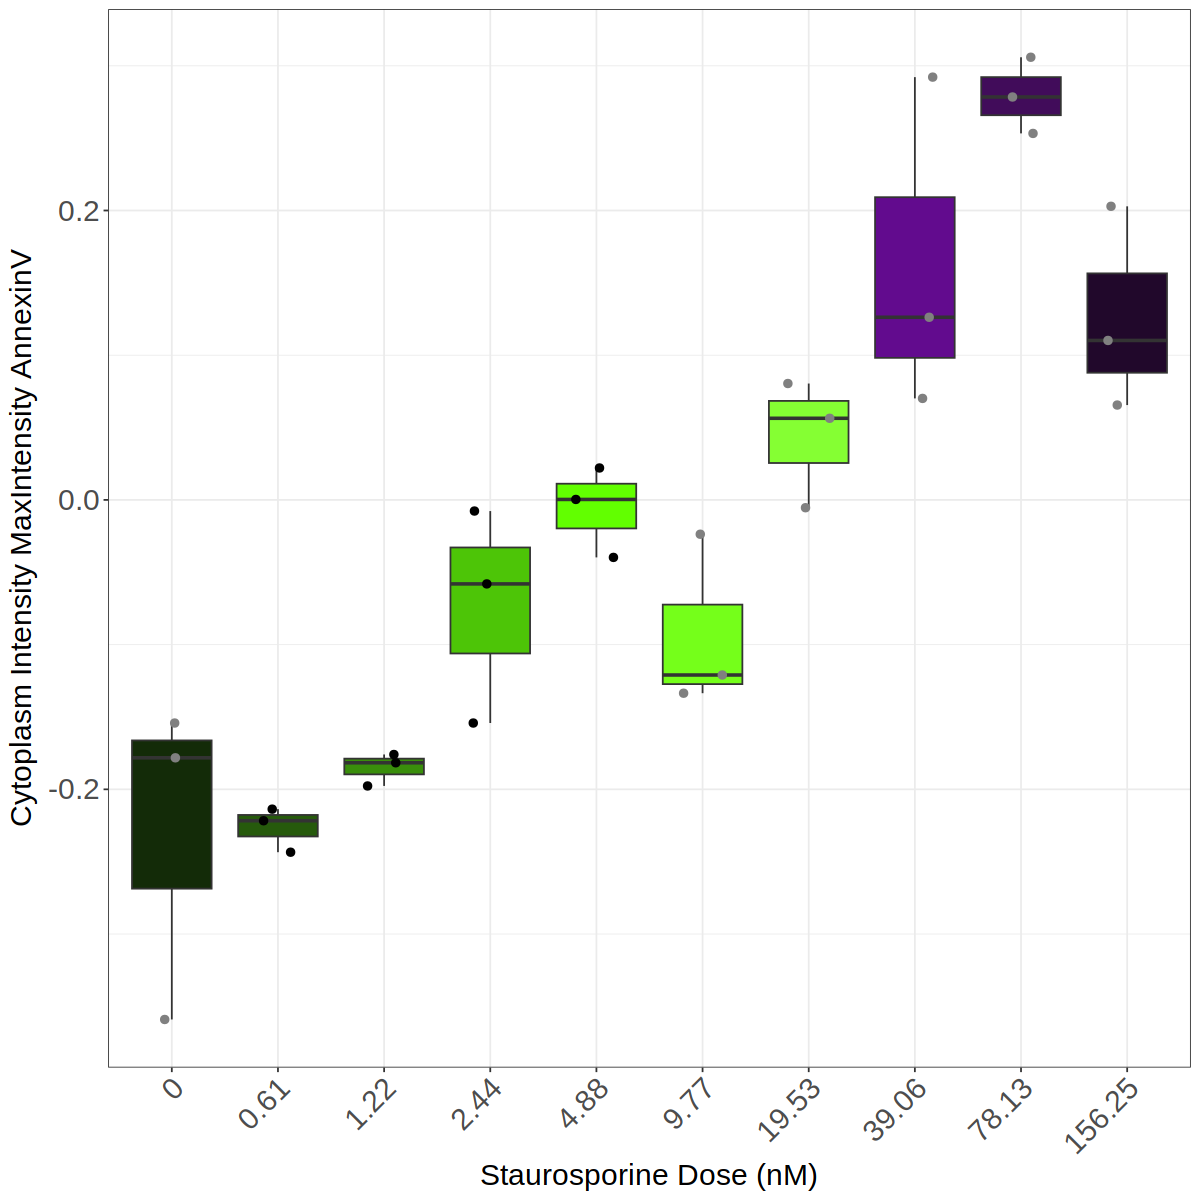

In [5]:

intensity_features_df$Metadata_dose <- as.character(intensity_features_df$Metadata_dose)
intensity_features_df$Metadata_dose <- factor(
    intensity_features_df$Metadata_dose,
    levels = c(
        '0',
        '0.61',
        '1.22',
        '2.44',
        '4.88',
        '9.77',
        '19.53',
        '39.06',
        '78.13',
        '156.25'
)
    )

points_color_palette_for_dose <- c(
    "0" = "#808080",
    "0.61" = "#000000",
    "1.22" = "#000000",
    "2.44" = "#000000",
    "4.88" = "#000000",
    "9.77" = "#808080",
    "19.53" = "#808080",
    "39.06" = "#808080",
    "78.13" = "#808080",
    "156.25" = "#808080"
)
# plot the intensity_features_df
width <- 10
height <- 10
options(repr.plot.width = width, repr.plot.height = height)
intensity_plot <- (
    ggplot(intensity_features_df, aes(x = Metadata_dose, y = value, fill = Metadata_dose))
    + geom_boxplot(aes(group=Metadata_dose), outlier.size = 0.5, outlier.colour = "gray")
    # add jittered points
    + geom_jitter(width = 0.2, size = 2, alpha = 1, aes(color = Metadata_dose))
    + labs(
        x = "Staurosporine Dose (nM)",
        y = sym(feature)
    )
    + theme_bw()
        + theme(
        axis.text.x = element_text(size = 18, angle = 45, hjust = 1),
        axis.title.x = element_text(size = 18),
        axis.title.y = element_text(size = 18),
        axis.text.y = element_text(size = 18),
        plot.title = element_text(size = 18, hjust = 0.5),
        legend.position = "none",
        strip.text = element_text(size = 18)
    )
    + scale_fill_manual(values = color_palette_dose)
    # add color to jitter points
    + scale_color_manual(values = points_color_palette_for_dose)
)
png(
    filename = file.path(
        figure_path,
        paste0("supp_figure_annexinV_intensity.png")
    ),
    width = width,
    height = height,
    units = "in",
    res = 600
)
intensity_plot
dev.off()
intensity_plot